In [3]:
!python -V    

Python 3.8.8


In [4]:
import pandas as pd

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [212]:
import pickle

In [93]:
df = pd.read_parquet(r'C:/Users/ACER-PC/Desktop/Z/nyc dataset/green_tripdata_2022-01.parquet')

In [95]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime

In [22]:
td = df.duration.iloc[0]

Timedelta('0 days 00:01:12')

In [24]:
td.total_seconds() / 60

1.2

In [96]:
df['duration'] = df['duration'].apply(lambda td: td.total_seconds() / 60)

In [104]:
df = df[((df.duration >= 1) & (df.duration <= 60))]

In [105]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [109]:
df[categorical] = df[categorical].astype(str)

,PULocationID,DOLocationID
0,42,42
1,116,41
2,41,140
3,181,181
4,33,170
...,...,...
62490,40,65
62491,36,61
62492,75,167
62493,116,166


In [149]:
#df[categorical + numerical]

#converts PD to dictionary
train_dict = df[categorical + numerical].to_dict(orient='records')

In [113]:
#converts dictionary into vector. One hot encoding
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)

In [115]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',
 'DOLocationID=146',
 'DOLocationID=147',
 'DOLocationID=148',

In [122]:
target = 'duration'
y_train = df[target].values

In [125]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [126]:
y_pred = lr.predict(X_train)

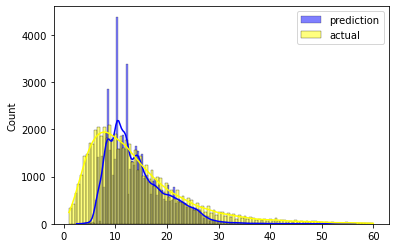

In [138]:
sns.histplot(y_pred, label='prediction', kde=True, color='blue')
sns.histplot(y_train, label='actual', kde=True, color='yellow')

plt.legend()

C:\Users\ACER-PC\Z\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER-PC\Z\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


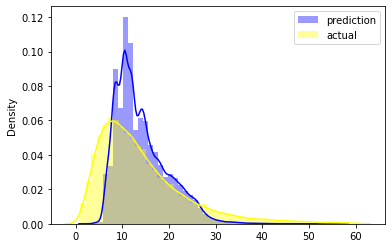

In [140]:
sns.distplot(y_pred, label='prediction', kde=True, color='blue')
sns.distplot(y_train, label='actual', kde=True, color='yellow')

plt.legend()

In [144]:
mean_squared_error(y_train, y_pred, squared=False)

7.652815235586976

In [196]:
df_train = read_dataframe(r'C:/Users/ACER-PC/Desktop/Z/nyc dataset/green_tripdata_2022-01.parquet')
df_val = read_dataframe(r'C:/Users/ACER-PC/Desktop/Z/nyc dataset/green_tripdata_2022-02.parquet')

In [150]:
 #create dataframe Function
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df['duration'] = df['duration'].apply(lambda td: td.total_seconds() / 60)

    df = df[((df.duration >= 1) & (df.duration <= 60))]

    categorical = ['PULocationID', 'DOLocationID']

    df[categorical] = df[categorical].astype(str)
    
    return df

In [176]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# Training the model
dv = DictVectorizer()

#converts dictionary into vector
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)


val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [177]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [211]:
lr = LinearRegression()
lr.fit(X_train, y_train)

#Predicting the model
y_pred = lr.predict(X_val)


#evaluation
mean_squared_error(y_val, y_pred, squared=False)

8.183214193043916

In [218]:
with open('C:/Users/ACER-PC/Desktop/Z/nyc dataset/models/lin_reg', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)